In [1]:
# ! pip uninstall surface_erasure_decoding
# ! pip3 install git+https://github.com/JiakaiW/surface_erasure_decoding

In [4]:
import matplotlib
import matplotlib.pyplot
import matplotlib.pyplot as plt

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# bbox_inches='tight'

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import statsmodels.stats.proportion as smp

def wilson_score_interval(x, n, confidence=0.95):
    """
    Compute the Wilson score confidence interval for a binomial proportion using statsmodels.
    
    Parameters:
    x : int
        Number of successes (yes outcomes).
    n : int
        Number of trials.
    confidence : float
        Confidence level for the interval (e.g., 0.95 for 95% confidence).
    
    Returns:
    (lower_bound, upper_bound) : tuple of floats
        Lower and upper bounds of the confidence interval.
    """
    lower_bound, upper_bound = smp.proportion_confint(x, n, alpha=1-confidence, method='wilson')
    return lower_bound, upper_bound


In [7]:
gate_time = 200*1e-6 # ms
qbt_lifetime_array = 10 ** np.linspace(-2,0.5,15) # ms
formatted_floats = [f"{num:.2e}" for num in qbt_lifetime_array]
# print(f"qbt_lifetime_array: {formatted_floats}")

p_p_array = gate_time / qbt_lifetime_array
# print(f"p_p_array: {p_p_array}")

# fig, axes = plt.subplots(1,2)
# axes[0].plot(qbt_lifetime_array,p_p_array,marker = 'o')
# axes[0].set_xscale('log')
# axes[0].set_yscale('log')
# axes[0].set_xlabel('qubit lifetime (ms)')
# axes[0].set_ylabel('p_p')


decay_lifetime_array = 10 ** np.linspace(-2.7,-0.7,14)# ms
formatted_floats = [f"{num:.2e}" for num in decay_lifetime_array]
# print(f"decay_lifetime_array: {formatted_floats}")

p_e_array = gate_time / decay_lifetime_array
# print(f"p_e_array: {p_e_array}")

# axes[1].plot(decay_lifetime_array,p_e_array,marker = 'o')
# axes[1].set_xscale('log')
# axes[1].set_yscale('log')
# axes[1].set_xlabel('decay lifetime (ms)')
# axes[1].set_ylabel('p_e')


# plt.tight_layout()

p_e_list = list(p_e_array)
p_z_shift_list = [0.0]
p_m_list = [0.0]
p_p_list = list(p_p_array)


In [8]:
import os
import json
import pandas as pd

json_list = []
directory = "erasure_decode_result_v2"
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as f:
            json_data = json.load(f)
        json_list.append(json_data)

directory = "erasure_decode_result_v2_additional_shots"
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as f:
            json_data = json.load(f)
        json_list.append(json_data)

df = pd.DataFrame(json_list)


In [9]:
# df.drop('job_id', axis=1, inplace=True)
agg_rules = {
    'shots': 'sum',
    'new_circ': 'sum',
}

df_grouped = df.groupby(['p_e', 'p_z_shift','p_p','p_m','d']).agg(agg_rules).reset_index()
df_grouped['p_logi_era'] = df_grouped['new_circ'] / df_grouped['shots']
# df_grouped['p_logi_normal'] = df_grouped['normal'] / df_grouped['shots']


In [10]:
import pymc as pm

distances = [3,5,7,9]

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [13]:

# from IPython.display import clear_output

# error_log = []

# print(f"num p_e {len(p_e_list)}, num p_p {len(p_p_list)}")
# distances = [3,5,7,9]

# intercept_mean_array = np.full((len(p_p_list),len(p_e_list)),np.nan)
# intercept_sd_array = np.full((len(p_p_list),len(p_e_list)),np.nan)
# slope_mean_array = np.full((len(p_p_list),len(p_e_list)),np.nan)
# slope_sd_array = np.full((len(p_p_list),len(p_e_list)),np.nan)
# for p_e_idx,p_e in enumerate(p_e_list):
#     for p_p_idx,p_p in enumerate(p_p_list):
#         clear_output()
#         print(f"doing {p_e_idx}, {p_p_idx}")
#         positive_arr = []
#         tot_shots_arr = []
#         distances_used = []
#         for d in distances:
#             num_positive = df_grouped.loc[(df_grouped['d'] == d) &
#                         (df_grouped['p_e'] == p_e_list[p_e_idx]) &
#                         (df_grouped['p_p'] == p_p_list[p_p_idx]) &
#                         (df_grouped['p_m'] == p_m_list[-1]) &
#                         (df_grouped['p_z_shift'] == p_z_shift_list[0]), 'new_circ'].iloc[0]
#             num_shots = df_grouped.loc[(df_grouped['d'] == d) &
#                         (df_grouped['p_e'] == p_e_list[p_e_idx]) &
#                         (df_grouped['p_p'] == p_p_list[p_p_idx]) &
#                         (df_grouped['p_m'] == p_m_list[-1]) &
#                         (df_grouped['p_z_shift'] == p_z_shift_list[0]), 'shots'].iloc[0]
#             if num_positive > 0 :
#                 positive_arr.append(num_positive)
#                 tot_shots_arr.append(num_shots)
#                 distances_used.append(d)
                
#         if len(distances_used)>=2:
#             try:
#                 positive_arr = np.array(positive_arr)
#                 tot_shots_arr = np.array(tot_shots_arr)
#                 distances_used = np.array(distances_used)

#                 y = positive_arr / tot_shots_arr

#                 with pm.Model() as model:
#                     # Weakly informative priors for the coefficients
#                     beta_0 = pm.Normal('beta_0', mu=0, sigma=10)
#                     beta_1 = pm.Normal('beta_1', mu=0, sigma=10)
                    
#                     # Linear predictor
#                     eta = beta_0 + beta_1 * distances_used
                    
#                     # Transform the linear predictor to the probability scale
#                     p = pm.Deterministic('p', pm.math.exp(eta))
                    
#                     # Likelihood (sampling distribution) of the observations
#                     y_obs = pm.Binomial('y_obs', n=tot_shots_arr, p=p, observed=positive_arr)
                    
#                     # Sampling from the posterior
#                     trace = pm.sample(2000, return_inferencedata=True, tune=1000)

#                 intercept_mean_array[p_p_idx,p_e_idx] = trace.posterior.beta_0.mean() 
#                 intercept_sd_array[p_p_idx,p_e_idx] = trace.posterior.beta_0.std() 
#                 slope_mean_array[p_p_idx,p_e_idx] = trace.posterior.beta_1.mean() 
#                 slope_sd_array[p_p_idx,p_e_idx] = trace.posterior.beta_1.std() 
#             except Exception as e:
#                 print(f"Error during sampling for p_e_idx={p_e_idx}, p_p_idx={p_p_idx}: {e}")
#                 error_log.append((p_e_idx, p_p_idx, f"SamplingError {str(e)}"))
#                 continue

# import pickle

# with open('my_tuple.pkl', 'wb') as file:
#     pickle.dump((intercept_mean_array, intercept_sd_array, slope_mean_array, slope_sd_array), file)

doing 13, 14


In [20]:
# for p_e_idx,p_e in enumerate(p_e_list):
#     for p_p_idx,p_p in enumerate(p_p_list):
#         if not np.isnan(slope_mean_array[p_p_idx,p_e_idx]):
#             continue
#         print(f"doing {p_e_idx}, {p_p_idx}")
#         positive_arr = []
#         tot_shots_arr = []
#         distances_used = []
#         for d in distances:
#             num_positive = df_grouped.loc[(df_grouped['d'] == d) &
#                         (df_grouped['p_e'] == p_e_list[p_e_idx]) &
#                         (df_grouped['p_p'] == p_p_list[p_p_idx]) &
#                         (df_grouped['p_m'] == p_m_list[-1]) &
#                         (df_grouped['p_z_shift'] == p_z_shift_list[0]), 'new_circ'].iloc[0]
#             num_shots = df_grouped.loc[(df_grouped['d'] == d) &
#                         (df_grouped['p_e'] == p_e_list[p_e_idx]) &
#                         (df_grouped['p_p'] == p_p_list[p_p_idx]) &
#                         (df_grouped['p_m'] == p_m_list[-1]) &
#                         (df_grouped['p_z_shift'] == p_z_shift_list[0]), 'shots'].iloc[0]
#             if num_positive > 0 :
#                 positive_arr.append(num_positive)
#                 tot_shots_arr.append(num_shots)
#                 distances_used.append(d)
                
#         if len(distances_used)>=2:
#             try:
#                 positive_arr = np.array(positive_arr)
#                 tot_shots_arr = np.array(tot_shots_arr)
#                 distances_used = np.array(distances_used)

#                 y = positive_arr / tot_shots_arr

#                 with pm.Model() as model:
#                     # Weakly informative priors for the coefficients
#                     beta_0 = pm.Normal('beta_0', mu=0, sigma=10)
#                     beta_1 = pm.Normal('beta_1', mu=0, sigma=10)
                    
#                     # Linear predictor
#                     eta = beta_0 + beta_1 * distances_used
                    
#                     # Transform the linear predictor to the probability scale
#                     p = pm.Deterministic('p', pm.math.exp(eta))
                    
#                     # Likelihood (sampling distribution) of the observations
#                     y_obs = pm.Binomial('y_obs', n=tot_shots_arr, p=p, observed=positive_arr)
                    
#                     # Sampling from the posterior
#                     trace = pm.sample(2000, return_inferencedata=True, tune=1000)

#                 intercept_mean_array[p_p_idx,p_e_idx] = trace.posterior.beta_0.mean() 
#                 intercept_sd_array[p_p_idx,p_e_idx] = trace.posterior.beta_0.std() 
#                 slope_mean_array[p_p_idx,p_e_idx] = trace.posterior.beta_1.mean() 
#                 slope_sd_array[p_p_idx,p_e_idx] = trace.posterior.beta_1.std() 
#             except Exception as e:
#                 print(f"Error during sampling for p_e_idx={p_e_idx}, p_p_idx={p_p_idx}: {e}")
#                 error_log.append((p_e_idx, p_p_idx, f"SamplingError {str(e)}"))
#                 continue

# import pickle

# with open('my_tuple.pkl', 'wb') as file:
#     pickle.dump((intercept_mean_array, intercept_sd_array, slope_mean_array, slope_sd_array), file)

doing 7, 11
doing 9, 14
doing 10, 13
doing 10, 14
doing 11, 12
doing 11, 13
doing 11, 14
doing 12, 12
doing 12, 13
doing 12, 14
doing 13, 11
doing 13, 12
doing 13, 13
doing 13, 14


In [11]:
import pickle

with open('my_tuple.pkl', 'rb') as file:
    intercept_mean_array, intercept_sd_array, slope_mean_array, slope_sd_array = pickle.load(file)

In [12]:
def plot_fit(p_e_idx, p_p_idx,ax,color,marker):
    p_e = p_e_list[p_e_idx]
    p_p = p_p_list[p_p_idx]
    print(f"p_e:{p_e}, p_p:{p_p}")

    positive_arr = []
    tot_shots_arr = []
    distances_used = []
    for d in distances:
        num_positive = df_grouped.loc[(df_grouped['d'] == d) &
                    (df_grouped['p_e'] == p_e_list[p_e_idx]) &
                    (df_grouped['p_p'] == p_p_list[p_p_idx]) &
                    (df_grouped['p_m'] == p_m_list[-1]) &
                    (df_grouped['p_z_shift'] == p_z_shift_list[0]), 'new_circ'].iloc[0]
        num_shots = df_grouped.loc[(df_grouped['d'] == d) &
                    (df_grouped['p_e'] == p_e_list[p_e_idx]) &
                    (df_grouped['p_p'] == p_p_list[p_p_idx]) &
                    (df_grouped['p_m'] == p_m_list[-1]) &
                    (df_grouped['p_z_shift'] == p_z_shift_list[0]), 'shots'].iloc[0]
        positive_arr.append(num_positive)
        tot_shots_arr.append(num_shots)
        distances_used.append(d)
        
    positive_arr = np.array(positive_arr)
    tot_shots_arr = np.array(tot_shots_arr)
    distances_used = np.array(distances_used)
    y = positive_arr / tot_shots_arr

    with pm.Model() as model:
        # Weakly informative priors for the coefficients
        beta_0 = pm.Normal('beta_0', mu=0, sigma=10)
        beta_1 = pm.Normal('beta_1', mu=0, sigma=10)
        
        # Linear predictor
        eta = beta_0 + beta_1 * distances_used
        
        # Transform the linear predictor to the probability scale
        p = pm.Deterministic('p', pm.math.exp(eta))
        
        # Likelihood (sampling distribution) of the observations
        y_obs = pm.Binomial('y_obs', n=tot_shots_arr, p=p, observed=positive_arr)
        
        # Sampling from the posterior
        trace = pm.sample(2000, return_inferencedata=True, tune=1000)

    mean_intercept = trace.posterior.beta_0.mean() 
    sd_intercept = trace.posterior.beta_0.std() 
    mean_slope = trace.posterior.beta_1.mean() 
    sd_slope = trace.posterior.beta_1.std() 


    x_values = distances_used
    y_pred_mean = float(mean_intercept) + float(mean_slope) * x_values

    ax.scatter(x_values, np.log10(y), label="Observed Data",color=color,marker=marker)
    ax.plot(x_values, np.log10(np.exp((y_pred_mean))), label="Fitted Line", color=color)

    ax.fill_between(x_values, 
                    np.log10(np.exp((float(mean_intercept - sd_intercept) + float(mean_slope - sd_slope) * x_values))),
                    np.log10(np.exp((float(mean_intercept + sd_intercept) + float(mean_slope + sd_slope) * x_values))),
                    color=color, alpha=0.3, label="Uncertainty")


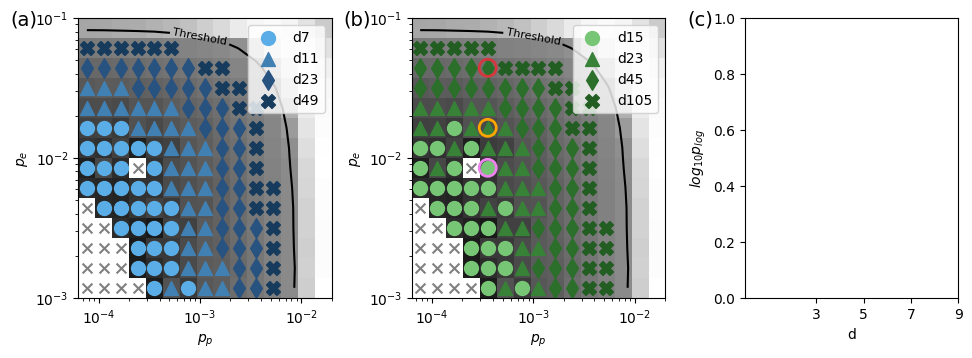

In [24]:
# def get_p_log_at_distance(d,p_e_idx, p_p_idx):
#     assert p_e_idx < len(p_e_list)
#     assert p_p_idx < len(p_p_list)

#     return np.exp(slope_mean_array[p_p_idx,p_e_idx]*d + intercept_mean_array[p_p_idx,p_e_idx])

# for d in list(range(3,200))[::2]:
#     temp  = []
#     for i,p_e in enumerate(p_e_list):
#         temp.append([])
#         for j,p_p in enumerate(p_p_list):
#             temp[-1].append(get_p_log_at_distance(d,i, j))
#     temp = np.array(temp)
#     globals()[f"p_log_d{d}_array"] = temp
    
# import matplotlib.colors as mcolors
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming p_p_list, p_e_list, slope_array, p_log_dX_array are predefined
# colors = [value for (key,value) in  mcolors.TABLEAU_COLORS.items()]
# # colors_list = [['#1b9e77', '#d95f02', '#e7298a',  '#e6ab02', '#a6761d', '#666666'],
# #                ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']]

# colors_list = [
#     [(0.353, 0.678, 0.901),(0.255, 0.502, 0.701),(0.157, 0.322, 0.502),(0.086, 0.231, 0.365),(0.063, 0.184, 0.325),(0.039, 0.137, 0.286)],
#     [(0.467, 0.775, 0.459), (0.216, 0.51, 0.216),(0.169, 0.435, 0.169), (0.133, 0.365, 0.133)]
# ]
# markers = ['o','^',"d","X"]
# fig = plt.figure(figsize=(10, 3.5)) 
# gs0 = fig.add_gridspec(nrows=1, ncols=1,left=0+0.07, right=1/3-0.01,bottom=0.15,top = 0.95)
# gs1 = fig.add_gridspec(nrows=1, ncols=1,left=1/3+0.07, right=2/3-0.01,bottom=0.15,top = 0.95)
# gs2 = fig.add_gridspec(nrows=1, ncols=1,left=2/3+0.07, right=3/3-0.05,bottom=0.15,top = 0.95)
# ax0 = fig.add_subplot(gs0[0])
# ax1 = fig.add_subplot(gs1[0])
# ax2 = fig.add_subplot(gs2[0])

# # fig,axs = plt.subplots(2,2,figsize=(5,5))
# # ax0=axs[0,0]
# # ax1=axs[0,1]
# # ax2=axs[1,0]



# temp_x = np.arange(len(p_p_list))
# temp_y = np.arange(len(p_e_list))
# X, Y = np.meshgrid(temp_x, temp_y)

# for ax_idx, (ax, level,logical_error_str,d_list) in enumerate(zip([ ax0,ax1],
#                      [1e-6,1e-12],
#                      ['MegaQuop','TeraQuop'],
#                      [[7,  11,  23, 49],
#                       [ 15,23, 45,105]],
#                      )):

#     # Draw marks
#     drawn_mask = np.zeros_like(X, dtype=bool)
#     for d, color,marker in zip(d_list,
#                         colors_list[ax_idx],
#                         markers):
        
#         current_mask = np.array(globals()[f"p_log_d{d}_array"] <= level, dtype=bool) & ~drawn_mask
#         drawn_mask = drawn_mask | current_mask
#         ax.scatter(X[current_mask], Y[current_mask], marker=marker, color=color, s=100, label=f'd{d}',alpha=1)


#     # Draw threshold contour
#     contour = ax.contour(X, Y, slope_mean_array.T, levels=[0], colors='black')
#     ax.clabel(contour,  fmt={0: 'Threshold'},inline=True, fontsize=8, manual=[(8, 4)])


#     # Draw slope as background color
#     # cmap = plt.get_cmap('Greys')
#     # cmap = plt.get_cmap('RdPu')
#     cmap = mcolors.LinearSegmentedColormap.from_list("white_to_grey", ["white",(0.1,0.1,0.1)])
#     cmap = cmap.reversed()
#     cmap = cmap(np.arange(cmap.N))
#     cmap[:, -1] = np.linspace(1, 1, cmap.shape[0])  # Set alpha to 1 for all colors
#     cmap = mcolors.ListedColormap(cmap)
#     cmap.set_bad(color='white')  # Set color for NaN values
#     cax = ax.imshow(slope_mean_array.T, cmap= cmap, norm= mcolors.TwoSlopeNorm(vmin = np.nanmin(slope_mean_array.T),vcenter = 0,vmax = np.nanmax(slope_mean_array.T)),
#             aspect='auto',origin='lower')


#     # Draw NaN marks
#     nan_mask = np.isnan(slope_mean_array.T)
#     ax.scatter(X[nan_mask], Y[nan_mask], marker='x', color='grey', s=50,alpha=1)

#     ax.set_xticks(np.arange(len(p_p_list)))
#     ax.set_yticks(np.arange(len(p_e_list)))
#     xmin = p_p_list[-1]
#     xmax = p_p_list[0]
#     ymin = p_e_list[-1]-3e-6 #p_e_list[-1] == p_e_list[-1]
#     ymax = p_e_list[0]
#     ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
#     # Create a new axis on top of the original one
#     pos = ax.get_position()
#     ax_twin = fig.add_axes(pos, frameon=False)
#     ax_twin.set_xlim(xmin, xmax)
#     ax_twin.set_ylim(ymin, ymax)
#     ax_twin.set_xscale('log')
#     ax_twin.set_yscale('log')
#     ax_twin.set_xlabel(r'$p_p$')
#     ax_twin.set_ylabel(r'$p_e$')
#     ax.invert_xaxis()
#     ax.invert_yaxis()
#     ax.legend()


# # list_of_fitting_examples = [(2,8),(5,8),(8,8)]

# list_of_fitting_examples = [(2,10),(5,10),(7,10)]
# for (p_e_idx,p_p_idx),color in zip(list_of_fitting_examples,
#                         #    ['#4999c3','#d5373d','black']):
#                         ['#d5373d','orange','violet']):
#     ax1.scatter( [p_p_idx], [p_e_idx],marker='o',facecolors='none',  edgecolors=color, s=150,linewidths=2)
#     # plot_fit(p_e_idx =p_e_idx, p_p_idx= p_p_idx,ax=ax2,color=color)  

# ax2.set_xticks([3,5,7,9])
# ax2.set_xlabel('d')
# ax2.set_ylabel(rf"$log_{{10}}p_{{log}}$")

# ax0.text(-0.27, 1.03, '(a)', transform=ax0.transAxes, fontsize=14,  va='top')
# ax1.text(-0.27, 1.03, '(b)', transform=ax1.transAxes, fontsize=14,  va='top')
# ax2.text(-0.27, 1.03, '(c)', transform=ax2.transAxes, fontsize=14,  va='top')

# # plt.tight_layout()
# fig.savefig('new_tolerance_scatter_plot.pdf')


In [13]:
temp_x = np.arange(len(p_p_list))
temp_y = np.arange(len(p_e_list))
X, Y = np.meshgrid(temp_x, temp_y)

p_e:0.049355742297809514, p_p:0.00032757874139081276


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


p_e:0.02430218822751778, p_p:0.00032757874139081276


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.
/tmp/ipykernel_719833/601277578.py:55: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(x_values, np.log10(y), label="Observed Data",color=color,marker=marker)


p_e:0.008396666781944982, p_p:0.00032757874139081276


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.
/tmp/ipykernel_719833/601277578.py:55: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(x_values, np.log10(y), label="Observed Data",color=color,marker=marker)


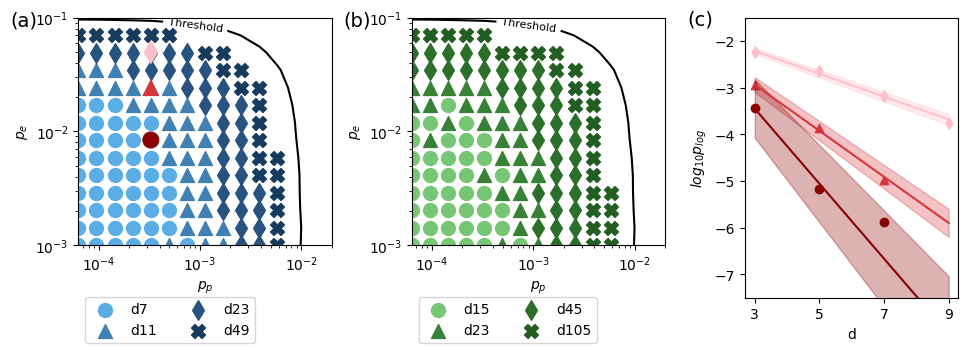

In [14]:
def get_p_log_at_distance(d,p_e_idx, p_p_idx):
    assert p_e_idx < len(p_e_list)
    assert p_p_idx < len(p_p_list)

    return np.exp(slope_mean_array[p_p_idx,p_e_idx]*d + intercept_mean_array[p_p_idx,p_e_idx])

for d in list(range(3,200))[::2]:
    temp  = []
    for i,p_e in enumerate(p_e_list):
        temp.append([])
        for j,p_p in enumerate(p_p_list):
            temp[-1].append(get_p_log_at_distance(d,i, j))
    temp = np.array(temp)
    globals()[f"p_log_d{d}_array"] = temp
    
import matplotlib.pyplot as plt
import numpy as np

colors_list = [
    [(0.353, 0.678, 0.901),(0.255, 0.502, 0.701),(0.157, 0.322, 0.502),(0.086, 0.231, 0.365),(0.063, 0.184, 0.325),(0.039, 0.137, 0.286)],
    [(0.467, 0.775, 0.459), (0.216, 0.51, 0.216),(0.169, 0.435, 0.169), (0.133, 0.365, 0.133)]
]
markers = ['o','^',"d","X"]
fig = plt.figure(figsize=(10, 3.5)) 
gs0 = fig.add_gridspec(nrows=1, ncols=1,left=0+0.07, right=1/3-0.01,bottom=0.3,top = 0.95)
gs1 = fig.add_gridspec(nrows=1, ncols=1,left=1/3+0.07, right=2/3-0.01,bottom=0.3,top = 0.95)
gs2 = fig.add_gridspec(nrows=1, ncols=1,left=2/3+0.07, right=3/3-0.05,bottom=0.15,top = 0.95)
ax0 = fig.add_subplot(gs0[0])
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs2[0])
gs3 = fig.add_gridspec(nrows=1, ncols=1,left=0+0.07, right=1/3-0.01,bottom=0.0,top = 0.4)
gs4 = fig.add_gridspec(nrows=1, ncols=1,left=1/3+0.07, right=2/3-0.01,bottom=0.0,top = 0.4)
ax3 = fig.add_subplot(gs3[0])
ax4 = fig.add_subplot(gs4[0])
for ax_idx, (ax, 
             level,
             logical_error_str,
             d_list) in enumerate(zip(
                                [ ax0,ax1],
                                [1e-6,1e-12],
                                ['MegaQuop','TeraQuop'],
                                [[7,  11,  23, 49],
                                [ 15,23, 45,105]],
                                )):

    # Draw marks
    drawn_mask = np.zeros_like(X, dtype=bool)
    for d, color,marker in zip(d_list,
                        colors_list[ax_idx],
                        markers):
        
        current_mask = np.array(globals()[f"p_log_d{d}_array"] <= level, dtype=bool) & ~drawn_mask
        drawn_mask = drawn_mask | current_mask
        ax.scatter(X[current_mask], Y[current_mask], marker=marker, color=color, s=100, label=f'd{d}',alpha=1)


    # Draw NaN marks
    nan_mask = np.isnan(slope_mean_array.T)
    ax.scatter(X[nan_mask], Y[nan_mask], marker=markers[0], color=colors_list[ax_idx][0], s=100,alpha=1)

    # Draw threshold contour
    contour = ax.contour(X, Y, slope_mean_array.T, levels=[0], colors='black')
    ax.clabel(contour,  fmt={0: 'Threshold'},inline=True, fontsize=8, manual=[(8, 4)])

    ax.set_xticks(np.arange(len(p_p_list)))
    ax.set_yticks(np.arange(len(p_e_list)))


    # ax.set_xlim(X_coord_at_log10pp_being_minus_one, temp_x[-1])

    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    # Create a new axis on top of the original one
    pos = ax.get_position()
    ax_twin = fig.add_axes(pos, frameon=False)
    xmin = p_p_list[-1]
    xmax = p_p_list[0]
    # xmax = 1e-1
    ymin = p_e_list[-1] -3e-6 # to show the 1e-3 tick
    ymax = p_e_list[0]
    ax_twin.set_xlim(xmin, xmax)
    ax_twin.set_ylim(ymin, ymax)
    ax_twin.set_xscale('log')
    ax_twin.set_yscale('log')
    ax_twin.set_xlabel(r'$p_p$')
    ax_twin.set_ylabel(r'$p_e$')
    ax.invert_xaxis()
    ax.invert_yaxis()

for legend_ax, plot_ax in zip([ax3,ax4],[ax0,ax1]):
    handles, labels = plot_ax.get_legend_handles_labels()
    legend_ax.legend(handles, labels,ncols=2,loc='lower left')
    legend_ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    legend_ax.axis('off')

list_of_fitting_examples = [(2,10),(4,10),(7,10)]
for (p_e_idx,p_p_idx),color,marker in zip(list_of_fitting_examples,
                        ['pink','#d5373d','darkred'],
                        ["d" ,'^','o']):
    ax0.scatter( [p_p_idx], [p_e_idx],marker=marker,facecolors=color,  edgecolors='None', s=150,alpha = 1)
    plot_fit(p_e_idx =p_e_idx, p_p_idx= p_p_idx,ax=ax2,color=color,marker=marker)  
ax2.set_ylim(-7.5,-1.5)
ax2.set_xticks([3,5,7,9])
ax2.set_xlabel('d')
ax2.set_ylabel(rf"$log_{{10}}p_{{log}}$")

ax0.text(-0.27, 1.03, '(a)', transform=ax0.transAxes, fontsize=14,  va='top')
ax1.text(-0.27, 1.03, '(b)', transform=ax1.transAxes, fontsize=14,  va='top')
ax2.text(-0.27, 1.03, '(c)', transform=ax2.transAxes, fontsize=14,  va='top')

# plt.tight_layout()
fig.savefig('new_tolerance_scatter_plot_nicer.pdf')


In [15]:
np.log10(2e-1)

-0.6989700043360187

In [16]:
new_ymax = 1.09e-1
new_ymin = 8e-4
log10_pe_list = np.log10(p_e_list)
intercept = log10_pe_list[0]
slope = ( log10_pe_list[1] -  log10_pe_list[0]) / 1
# -1 = y *  slope + intercept
y_coord_at_log10_max= (np.log10(new_ymax)-intercept)/ slope
y_coord_at_log10_min= (np.log10(new_ymin)-intercept)/ slope


In [17]:
new_xmax = 1.08e-2
new_xmin = 5e-5
log10_pp_list = np.log10(p_p_list)
intercept = log10_pp_list[0]
slope = ( log10_pp_list[1] -  log10_pp_list[0]) / 1
# -1 = y *  slope + intercept
x_coord_at_log10_max= (np.log10(new_xmax)-intercept)/ slope
x_coord_at_log10_min= (np.log10(new_xmin)-intercept)/ slope

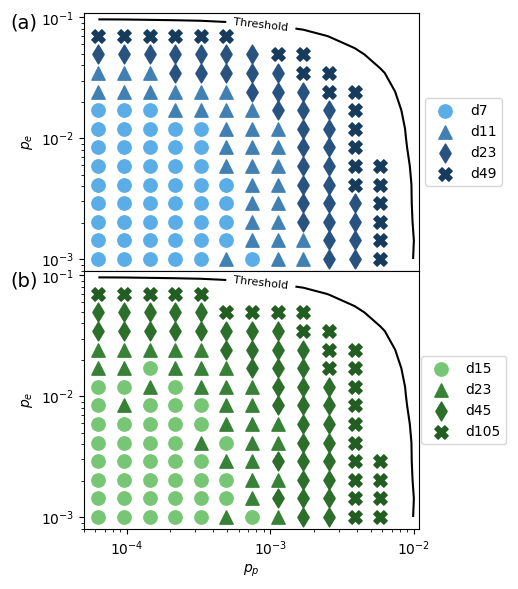

In [18]:
def get_p_log_at_distance(d,p_e_idx, p_p_idx):
    assert p_e_idx < len(p_e_list)
    assert p_p_idx < len(p_p_list)

    return np.exp(slope_mean_array[p_p_idx,p_e_idx]*d + intercept_mean_array[p_p_idx,p_e_idx])

for d in list(range(3,200))[::2]:
    temp  = []
    for i,p_e in enumerate(p_e_list):
        temp.append([])
        for j,p_p in enumerate(p_p_list):
            temp[-1].append(get_p_log_at_distance(d,i, j))
    temp = np.array(temp)
    globals()[f"p_log_d{d}_array"] = temp
    
import matplotlib.pyplot as plt
import numpy as np

colors_list = [
    [(0.353, 0.678, 0.901),(0.255, 0.502, 0.701),(0.157, 0.322, 0.502),(0.086, 0.231, 0.365),(0.063, 0.184, 0.325),(0.039, 0.137, 0.286)],
    [(0.467, 0.775, 0.459), (0.216, 0.51, 0.216),(0.169, 0.435, 0.169), (0.133, 0.365, 0.133)]
]
markers = ['o','^',"d","X"]
fig = plt.figure(figsize=(5, 6)) 
left = 0.15
right_plot = 0.82
height_plot = 0.43
bottom = 0.1
gs0 = fig.add_gridspec(nrows=1, ncols=1,left=left, right=right_plot,bottom=bottom+height_plot,top = bottom + height_plot  + height_plot)
gs1 = fig.add_gridspec(nrows=1, ncols=1,left=left, right=right_plot,bottom=bottom,top = bottom + height_plot)
gs3 = fig.add_gridspec(nrows=1, ncols=1,left=right_plot, right=1,bottom=bottom+height_plot,top = bottom + height_plot  + height_plot)
gs4 = fig.add_gridspec(nrows=1, ncols=1,left=right_plot, right=1,bottom=bottom,top =bottom + height_plot)

ax0 = fig.add_subplot(gs0[0])
ax1 = fig.add_subplot(gs1[0])
ax3 = fig.add_subplot(gs3[0])
ax4 = fig.add_subplot(gs4[0])

marker_size = 92

ax_twins = []
for ax_idx, (ax, 
             level,
             logical_error_str,
             d_list) in enumerate(zip(
                                [ ax0,ax1],
                                [1e-6,1e-12],
                                ['MegaQuop','TeraQuop'],
                                [[7,  11,  23, 49],
                                [ 15,23, 45,105]],
                                )):

    # Draw marks
    drawn_mask = np.zeros_like(X, dtype=bool)
    for d, color,marker in zip(d_list,
                        colors_list[ax_idx],
                        markers):
        
        current_mask = np.array(globals()[f"p_log_d{d}_array"] <= level, dtype=bool) & ~drawn_mask
        drawn_mask = drawn_mask | current_mask
        ax.scatter(X[current_mask], Y[current_mask], marker=marker, color=color, s=marker_size, label=f'd{d}',alpha=1)


    # Draw NaN marks
    nan_mask = np.isnan(slope_mean_array.T)
    ax.scatter(X[nan_mask], Y[nan_mask], marker=markers[0], color=colors_list[ax_idx][0], s=marker_size,alpha=1)

    # Draw threshold contour
    contour = ax.contour(X, Y, slope_mean_array.T, levels=[0], colors='black')
    ax.clabel(contour,  fmt={0: 'Threshold'},inline=True, fontsize=8, manual=[(8, 4)])

    ax.set_xticks(np.arange(len(p_p_list)))
    ax.set_yticks(np.arange(len(p_e_list)))


    ax.set_ylim( y_coord_at_log10_max,y_coord_at_log10_min)
    ax.set_xlim( x_coord_at_log10_max,x_coord_at_log10_min)

    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    # Create a new axis on top of the original one
    pos = ax.get_position()
    ax_twin = fig.add_axes(pos, frameon=False)
    # xmin = p_p_list[-1]
    # xmax = p_p_list[0]
    # xmax = 1e-1
    # ymin = p_e_list[-1] -3e-6 # to show the 1e-3 tick
    # ymax = p_e_list[0]
    ymin = new_ymin
    ymax =new_ymax
    xmin = new_xmin
    xmax =new_xmax
    ax_twin.set_xlim(xmin, xmax)
    ax_twin.set_ylim(ymin, ymax)
    ax_twin.set_xscale('log')
    ax_twin.set_yscale('log')
    ax_twin.set_xlabel(r'$p_p$')
    ax_twin.set_ylabel(r'$p_e$')
    ax_twins.append(ax_twin)
    ax.invert_xaxis()
    ax.invert_yaxis()

ax_twins[0].set_xticks([]) 
ax_twins[0].set_xlabel('')    
ax_twins[0].xaxis.set_visible(False)

for legend_ax, plot_ax in zip([ax3,ax4],[ax0,ax1]):
    handles, labels = plot_ax.get_legend_handles_labels()
    legend_ax.legend(handles, labels,ncols=1,loc='center', bbox_transform=legend_ax.transAxes)
    legend_ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    legend_ax.axis('off')
    

ax0.text(-0.22,1, '(a)', transform=ax0.transAxes, fontsize=14,  va='top')
ax1.text(-0.22, 1, '(b)', transform=ax1.transAxes, fontsize=14,  va='top')

fig.savefig('new_tolerance_scatter_plot_nicer.pdf',bbox_inches='tight')
